In [58]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,Source
from perceval.polyquantique.algorithm.ProcessorJitter import ProcessorJitter
from perceval.polyquantique.algorithm.DistributionEnvelope import Schmidt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import itertools

### Create base vector

In [59]:
source = Source(["Dirac",1],["Exponential",1/0.055])
state = "|0,1,1,0>"
of0 = np.array([0,0,0.1,0])
bv = BasicStateJitter(state,offset=of0,source=source)

### Print vector input and new base

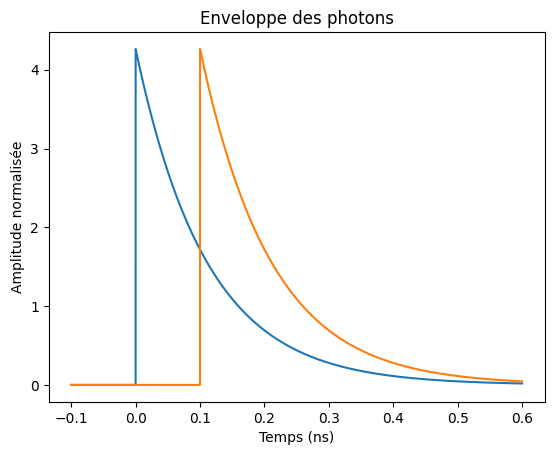

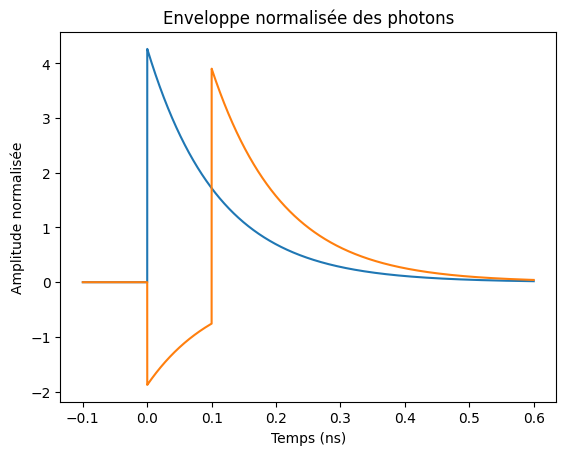

In [60]:
bv.print_vect()

### Coefficient matrix

In [61]:
print(bv.coef_matrix)

[[0.99994536 0.        ]
 [0.40305011 0.9153647 ]]


### States used and coefficient associated

In [62]:
print(bv.coef_list )
print(bv.bs_vector)

[0.16243164 0.83780097 0.         0.        ]
[[(0, 1, 1, 0), (0, 0, 0, 0)], [(0, 1, 0, 0), (0, 0, 1, 0)], [(0, 0, 1, 0), (0, 1, 0, 0)], [(0, 0, 0, 0), (0, 1, 1, 0)]]


### Create HOM circuit

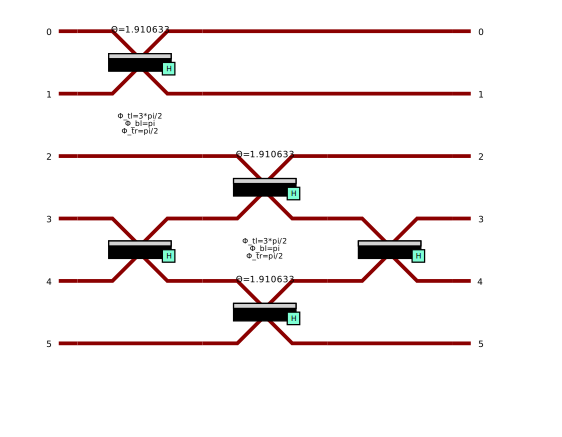

In [63]:
cnot = pcvl.Circuit(6, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())

pcvl.pdisplay(cnot)

### Use processor on HOM

In [64]:
processor = pcvl.Processor("Naive", cnot)
processor.add_herald(0, 0)
processor.add_herald(5, 0)
pcvl.pdisplay(processor, recursive = True)
Pj = ProcessorJitter(bv,processor)
pcvl.pdisplay(Pj.analyser)
states,prob = Pj.print_output()

,"|0,0,0,0>","|0,0,0,1>","|1,0,0,0>","|0,0,1,0>","|0,1,0,0>","|2,0,0,0>","|1,1,0,0>","|1,0,1,0>","|1,0,0,1>","|0,2,0,0>","|0,1,1,0>","|0,1,0,1>","|0,0,0,2>","|0,0,1,1>","|0,0,2,0>"
"|0,0,0,0>",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"|0,0,1,0>",0,0,0,1/2,1/2,0,0,0,0,0,0,0,0,0,0
"|0,1,0,0>",0,1/3,0,1/3,1/3,0,0,0,0,0,0,0,0,0,0
"|0,1,1,0>",0,0,0,0,0,0,0,0,0,1/3,0,1/6,0,1/6,1/3


Probabilite totale = 1.000232611526834
Probabilite totale = 1.000232611526834
Probabilite totale = 1.000232611526834
Probabilite totale = 1.000232611526834
Probabilite totale = 1.000232611526834
|2,0,0,0> [0.]
Probabilite totale = 1.000232611526834
|1,1,0,0> [0.]
Probabilite totale = 1.000232611526834
|1,0,1,0> [0.]
Probabilite totale = 1.000232611526834
|1,0,0,1> [0.]
Probabilite totale = 1.000232611526834
|0,2,0,0> [0.19377737]
Probabilite totale = 1.000232611526834
|0,1,1,0> [0.27926699]
Probabilite totale = 1.000232611526834
|0,1,0,1> [0.16670544]
Probabilite totale = 1.000232611526834
|0,0,0,2> [0.]
Probabilite totale = 1.000232611526834
|0,0,1,1> [0.16670544]
Probabilite totale = 1.000232611526834
|0,0,2,0> [0.19377737]
Probabilite totale = 1.000232611526834


In [65]:
bs10 = pcvl.BasicState([0,1,1,0])
bs11 = pcvl.BasicState(([0,1,0,1]))
A = dict()
for i,j in zip(states,prob):
    if i == bs10:
        A[i] = j
    elif i == bs11:
        A[i] = j
print(A)

{<perceval.utils.statevector.BasicState object at 0x7ff1694634f0>: array([0.27926699]), <perceval.utils.statevector.BasicState object at 0x7ff169463220>: array([0.16670544])}


In [66]:
normConst = A[bs10] + A[bs11]
A[bs10] /= normConst
A[bs11] /= normConst

for i,j in A.items():
    print(i,j)


|0,1,1,0> [0.62619789]
|0,1,0,1> [0.37380211]
